In [ ]:
## matplot 참고 사이트 
# https://matplotlib.org/stable/gallery/showcase/anatomy.html

In [ ]:
## fig 또는 figure는 전체 그래프의 크기
## Axes : 그래프가 그려지는 Figure의 하위섹션. title, X-Label, Y-Label
## Axis : Axes의 하위 요소로 그래프의 척도를 나타내는 숫자 선
##        2차원 그래프는 X와 Y Axis, 3차원은 X,Y,Z Axis를 가짐
## Label : figure의 다양한 요소의 이름
## Legend : Axes안에 여러 개의 그림이 있는 경우에 입력 값에 따라서 각각의 Label이 존재함
## Title : 각 Axes에 주어진 이름. figure가 각각의 Title로 여러 개의 Axes를 가짐, Figure 또한 각각의 Title을 가짐
## Ticklabels : 각 'Axis(X,Y 또는 Z)'는 여러 개의 동일한 'Bin'으로 나눈 값의 범위
##         'Bin'은 두 가지 레벨에서 선택
## Spines : Figure의 가장자리를 의미함. 각각의 "Axes"에는 네개의 Spines가 존재함(Top, Bottom, Left, Right)
## Grid : 그래프의 다양한 점의 좌표를 쉽게 읽도록 영역을 Grid로 나눌 수 있음

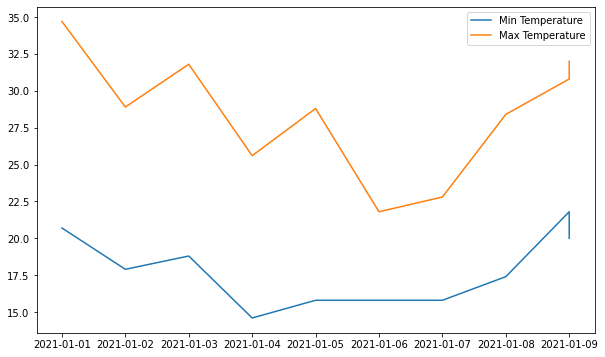

In [1]:
import matplotlib.pyplot as plt
dates = [  
    '2021-01-01','2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06','2021-01-07', '2021-01-08', '2021-01-09', '2021-01-09' ]

min_temperature= [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature =[34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,6)) 
axes.plot(dates,min_temperature,label= 'Min Temperature') 
axes.plot(dates,max_temperature,label= 'Max Temperature')
axes.legend() 
plt.show()

In [ ]:
### 예제
## 코로나 바이러스의 영향으로 중국인 관광객에 얼마나 줄었을까?
## 자료 : 외국인 출입국 통계 데이터 구하기
##   -> 한국관광공사에서 방한 외래관광객과 국민 해외관광객의 통계자료를 매월 발표
## 

In [2]:
from selenium import webdriver as wd
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 각각의 플랫폼에 따른 폰트 설정을 위해서
import platform     # 플랫폼 관련 라이브러리

if platform.system() == 'Windows':
    path = "C:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family='AppleGothic')
else :
    print('check your OS System')

In [6]:
### 압축해제한 자료파일 중에서 201901.xlsx 파일을 읽어오세요
## 1. row1번은 필요없다
## 2. 컬럼의 개수를 범위에 지정
## 3. 어디까지 실제로 사용할 데이터인지 확인
## 4. 불필요한 부분은 자르고 불러오세요
kto_201901 = pd.read_excel('data/kto_201901.xlsx',
                           skipfooter=4,
                           header=1,
                           usecols='A:G')
kto_201901.head()
kto_201901.tail()
##################
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [7]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [9]:
# 필터링 - 최소값이 "0"인 경우 확인
condition = (kto_201901['관광'] == 0) | (kto_201901['상용'] == 0) | (kto_201901['공용'] == 0) | (kto_201901['유학/연수'] == 0)
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [10]:
## 통합시 각 자료를 구분하기 위해서 "기준년월" 값을 추가
kto_201901['기준년월'] = '2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [11]:
## 국적 데이터 추리기
kto_201901['국적'].unique()     ## 컬럼 내에 중복을 제거한 값들을 보여줌

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [13]:
continent_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']

In [22]:
### continent_list에 포함되지 않은 국가만 선택
condition = (kto_201901.국적.isin(continent_list)==False)
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [23]:
kto_201901_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [24]:
### 인덱스 재정렬
kto_201901_country_newline = kto_201901_country.reset_index(drop=True)
kto_201901_country_newline.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [ ]:
##각 국가별 대륙을 지정, 대륙이라는 시리즈 생성하여 추가 
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3+ ['아프리카']*2 +['기타대륙'] + ['교포']
print(continents)
kto_201901_country_newline['대륙']= continents
kto_201901_country_newline


In [26]:
## 관광객 비율(%) 컬럼 생성하기 
kto_201901_country_newline['관광객비율(%)']= round(kto_201901_country_newline['관광']/kto_201901_country_newline['계']*100, 1)
kto_201901_country_newline.head() 

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


In [ ]:
## 관광객 비율(%) 컬럼으로 내림차순으로 정렬 
kto_201901_country_newline.sort_values(by='관광객비율(%)',ascending=False)

In [28]:
## 대륙별 관광객 비율의 평균
kto_201901_country_newline.pivot_table(values='관광객비율(%)', 
                                       index= '대륙',
                                       aggfunc='mean'
                                       )


,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [29]:
## 중국 국적 필터링
condition = (kto_201901_country_newline['국적'] == '중국')
kto_201901_country_newline[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [33]:
## 기준년월별로 전체 외국인 관광객 대비 국적별 관광객 비율확인
tourlist_sum = sum(kto_201901_country_newline['관광'])
tourlist_sum

884293

In [34]:
## 전체비율(%) 컬럼생성 
kto_201901_country_newline['전체비율(%)'] = round(kto_201901_country_newline['관광']/tourlist_sum *100, 1)
kto_201901_country_newline.head()


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8


In [ ]:
### 데이터 전처리 과정을 함수 작성하기
# 1. 불러올 데이터의 형태 파악
# 2. 엑셀 파일 파이썬으로 불러오기
# 3. 데이터 탐색(info(), describe())
# 4. 기준년월 컬럼 추가
# 5. 국적데이터만 남기기(대륙 데이터를 제거)
# 6. 대륙컬럼을 만들어주기
# 7. 국적별로 관광객비율(%) 살펴보기
# 8. 전체 외국인 관광객 대비 국적별 관광객 비율 살펴보기

In [40]:
# 함수 만들어보기
# 인자 - 년, 월
# 함수 내부 : 1. 파일 읽기
#            2. 기준년월 컬럼 추가
#            3. 국적데이터만 남기기
#            4. 대륙컬럼 추가
#            5. 국가별 관광객비율 컬럼 추가
#            6. 전체비율 컬럼 추가
def create_kto_data(yy,mm):
    # 1. 불러올 엑셀파일 경로 지정
    file_path = f"data/kto_{yy}{mm}.xlsx"
    
    # 2. 엑셀파일 불러오기
    df = pd.read_excel(file_path, header=1, skipfooter=4, usecols='A:G')
    
    # 3. 기준년월 컬럼추가
    df['기준년월'] = f"{yy}-{mm}"
    
    # 4. 국적데이터만 남기기
    ignore_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
    condition = (df['국적'].isin(ignore_list)==False)
    df_country = df[condition].reset_index(drop=True)
    
    # 5. 대륙 컬럼 추가
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3+ ['아프리카']*2 +['기타대륙'] + ['교포']
    df_country['대륙'] = continents
    
    # 6. 국가별 관광객비율(%) 컬럼추가
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1)
    
    # 7. 전체비율 컬럼추가
    tourlist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country.관광 / tourlist_sum *100, 1)
    
    # 8. 결과 반환
    return df_country


In [44]:
kto_text = create_kto_data('2018','09')
kto_text.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,240457,2182,208,1049,3951,247847,2018-09,아시아,97.0,23.7
1,대만,85584,79,16,346,1326,87351,2018-09,아시아,98.0,8.4
2,홍콩,48394,44,4,242,965,49649,2018-09,아시아,97.5,4.8
3,마카오,2972,2,0,32,29,3035,2018-09,아시아,97.9,0.3
4,태국,28154,43,355,115,5631,34298,2018-09,아시아,82.1,2.8


In [47]:
mm = 1
print('{:02}'.format(mm))

01


In [48]:
## str.zfill()
print(str(mm).zfill(2))

01


In [ ]:
### 데이터불러오기, 이중 for문을 사용하여 기준년월 출력
for yy in range(2010,2021):
    #print(yy)
    for mm in range(1,13):
        # yymm = '{}{:02}'.format(yy,mm)
        yymm = '{}{}'.format(yy,str(mm).zfill(2))
        print(yymm)

In [51]:
## 데이터를 담을 빈 데이터프레임
df = pd.DataFrame()     # 통합할 공간

for yy in range(2010,2021):
    for mm in range(1,13):
        try:
            tmp = create_kto_data(str(yy),str(mm).zfill(2))
        except:
            break
        df = df.append(tmp, ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13428\516082863.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13428\516082863.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13428\516082863.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13428\516082863.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykern

In [54]:
df.head()
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0
7499,교포,0,0,0,0,790,790,2020-05,교포,0.0,0.0


In [55]:
## kto_total.xlsx로 저장
df.to_excel("data/kto_total.xlsx",index=False)

In [58]:
## 국적별 필터링 된 데이터를 엑셀파일로 저장하기

# 중국 국적의 파일을 필터링
condition = (df['국적'] == '중국')
df_filter = df[condition]
file_path = "data/[국적별 관광객 데이터]중국.xlsx"
df_filter.to_excel(file_path,index=False)

In [60]:
cntry_list = df['국적'].unique()
len(cntry_list)

60

In [61]:
for cntry in cntry_list:
    # 국적으로 필터링
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    # 국적명을 반영한 파일 만들기
    file_path = f"data/[국적별 관광객 데이터]{cntry}.xlsx"
    
    # 엑셀로 저장
    df_filter.to_excel(file_path,index=False)

In [62]:
df = pd.read_excel('data/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [65]:
condition = (df['국적']=='중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


<function matplotlib.pyplot.show(close=None, block=None)>

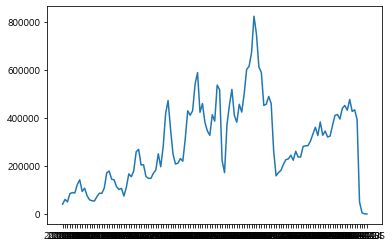

In [66]:
plt.plot(df_filter["기준년월"],df_filter['관광'])
plt.show

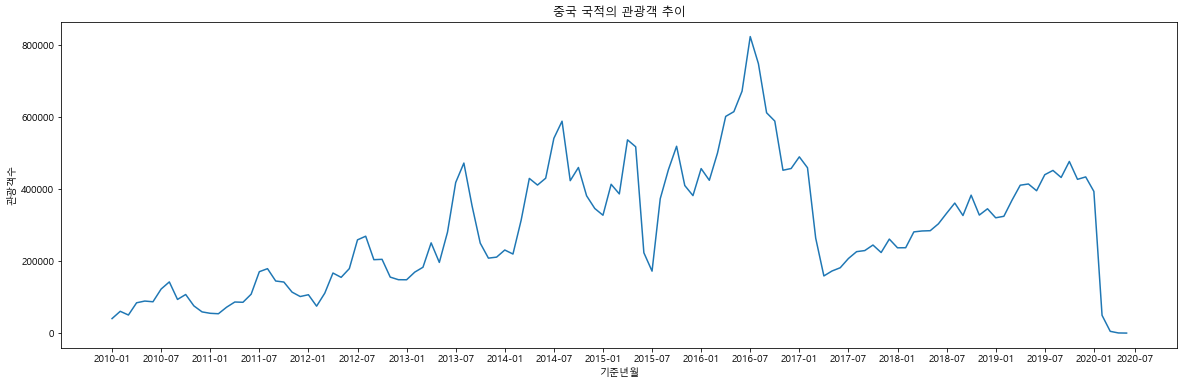

In [73]:
## 그래프 크기조절
plt.figure(figsize=(20,6))

## 그래프 내용
plt.plot(df_filter["기준년월"],df_filter['관광'])

## 그래프 타이틀,x축,y축 이름달기
plt.title("중국 국적의 관광객 추이")
plt.xlabel("기준년월")
plt.ylabel("관광객수")

## x축 눈금 값 설정
plt.xticks(['2010-01','2010-07','2011-01','2011-07','2012-01','2012-07','2013-01','2013-07','2014-01','2014-07','2015-01','2015-07','2016-01','2016-07','2017-01','2017-07','2018-01','2018-07','2019-01','2019-07','2020-01','2020-07'])
plt.show()

In [74]:
## 상위 5개 국가를 기준으로 그래프 그리기
cntry_list = ['중국','일본','대만','미국','홍콩']

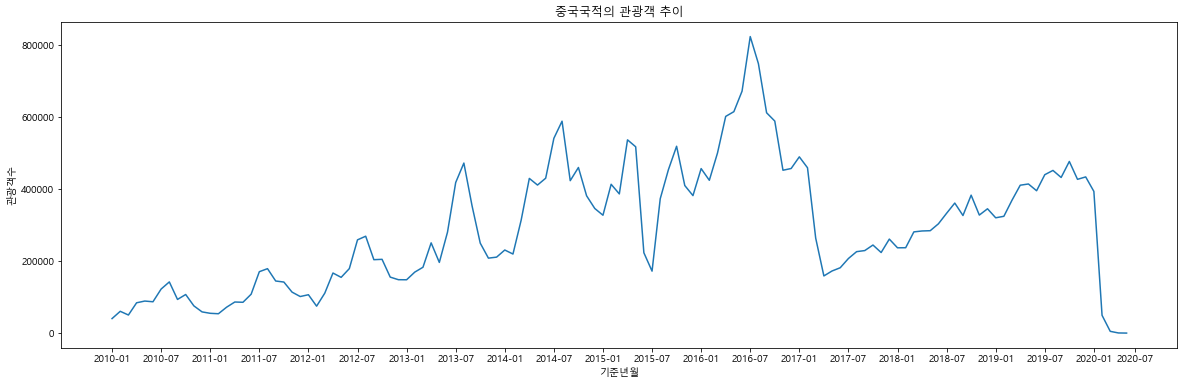

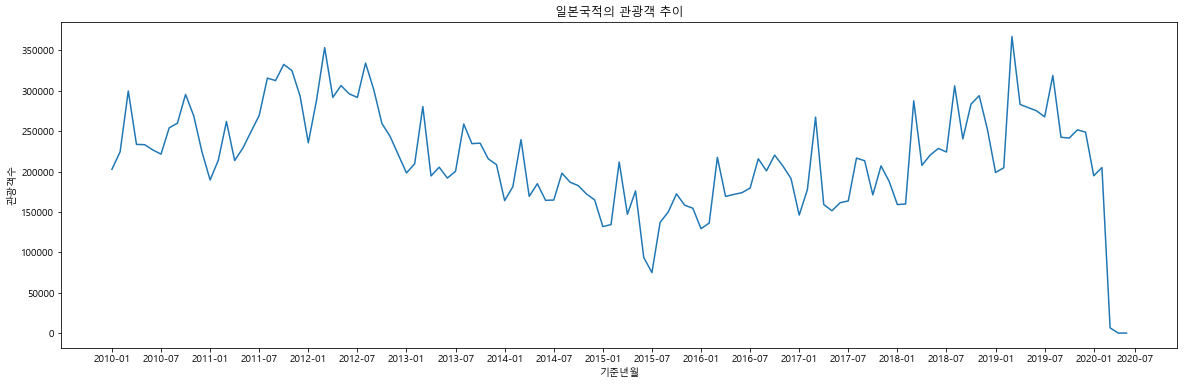

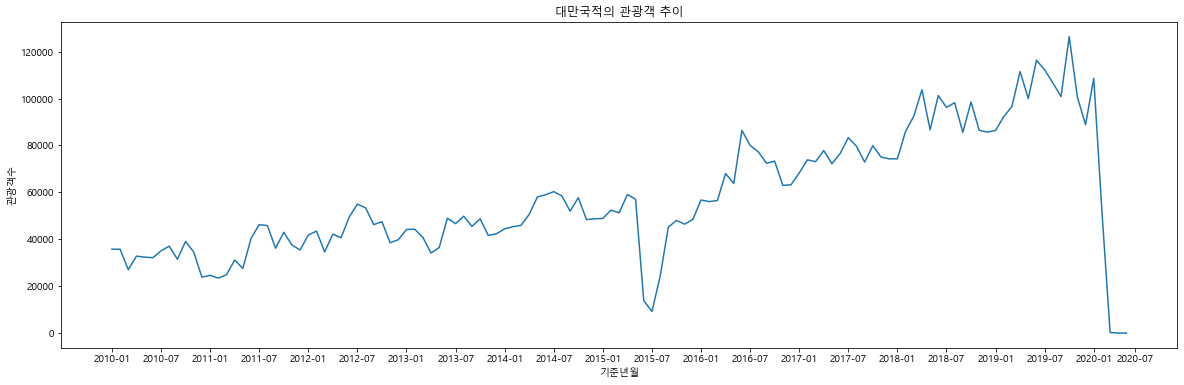

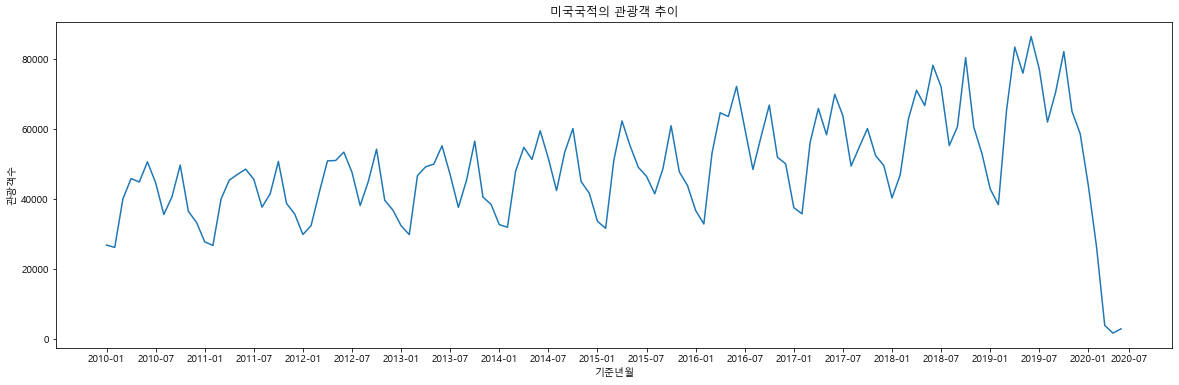

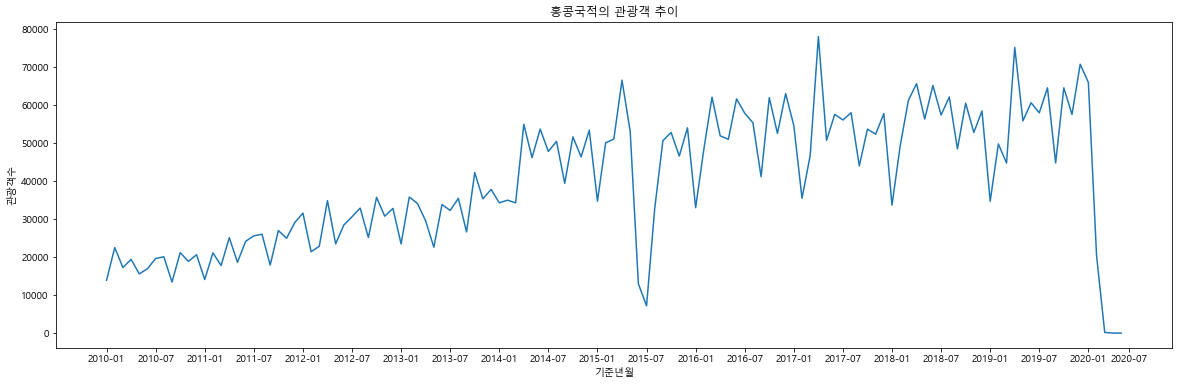

In [75]:
## 반복문으로 그래프 그리기
for cntry in cntry_list:
    ## 국적 관광객만 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    ## 그래프 그리기
    plt.figure(figsize=(20,6))
    
    ## 그래프 내용
    plt.plot(df_filter['기준년월'],df_filter['관광'])
    
    ## 타이틀, x축, y축 이름
    plt.title(f"{cntry}국적의 관광객 추이")
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks(['2010-01','2010-07','2011-01','2011-07','2012-01','2012-07','2013-01','2013-07','2014-01','2014-07','2015-01','2015-07','2016-01','2016-07','2017-01','2017-07','2018-01','2018-07','2019-01','2019-07','2020-01','2020-07'])
    plt.show()

In [76]:
## 히트맵 그래프 그리기
# 히트맵 그래프는 매트릭스 형태의 포함된 각 값을 컬러로 표현하는 데이터 시각화 방법
# 히트맵 그래프를 잘 그리려면 x축, y축 그래프 내용이 어떤 변수가 들어가야 할지 고민
# x축에는 월(month), y축에는 연도(year)를 넣고 그래프 내용에는 관광객숫자를 넣습니다.
df.head()

## str.slice() 함수를 사용하여 연도, 월 컬럼을 만들기
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)
df['월']

0       01
1       01
2       01
3       01
4       01
        ..
7495    05
7496    05
7497    05
7498    05
7499    05
Name: 월, Length: 7500, dtype: object

In [77]:
## 중국인 관광객 필터링
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [79]:
df_pivot = df_filter.pivot_table(values="관광", 
                                 index="년도",
                                 columns="월")
df_pivot.head()

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0


In [81]:
## 히트맵은 seaborn 라이브러리를 통해 나타낼 수 있음
import matplotlib.pyplot as plt
import seaborn as sns

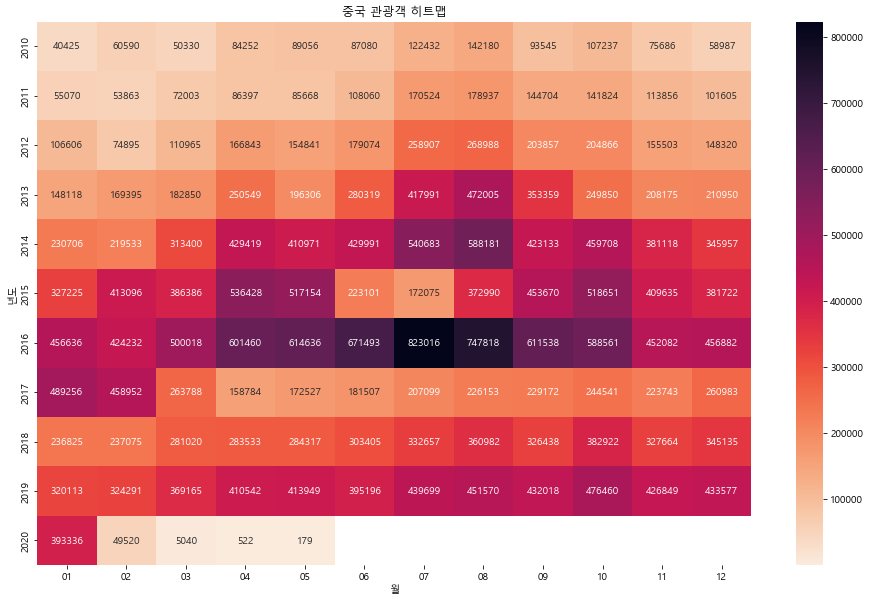

In [84]:
## 그래프 크기 설정
plt.figure(figsize=(16,10))

## 히트맵 그래프 그리기
sns.heatmap(df_pivot,annot=True,fmt='.0f',cmap="rocket_r")

## 그래프 타이틀 달기
plt.title('중국 관광객 히트맵')

## 그래프
plt.show()

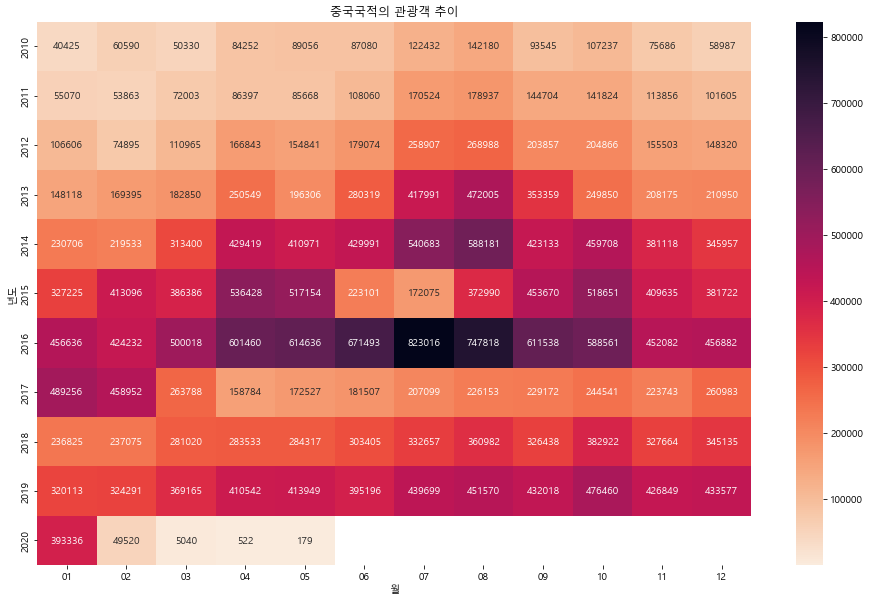

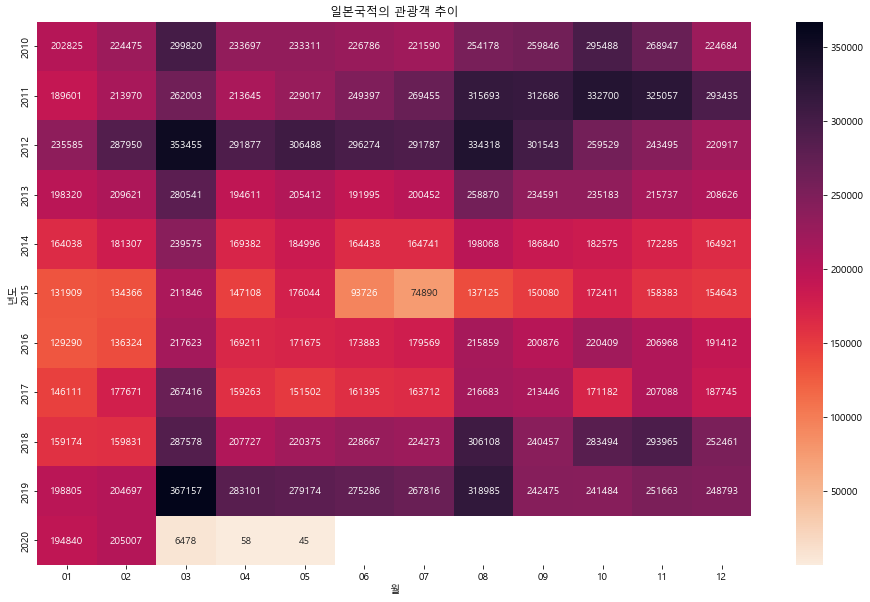

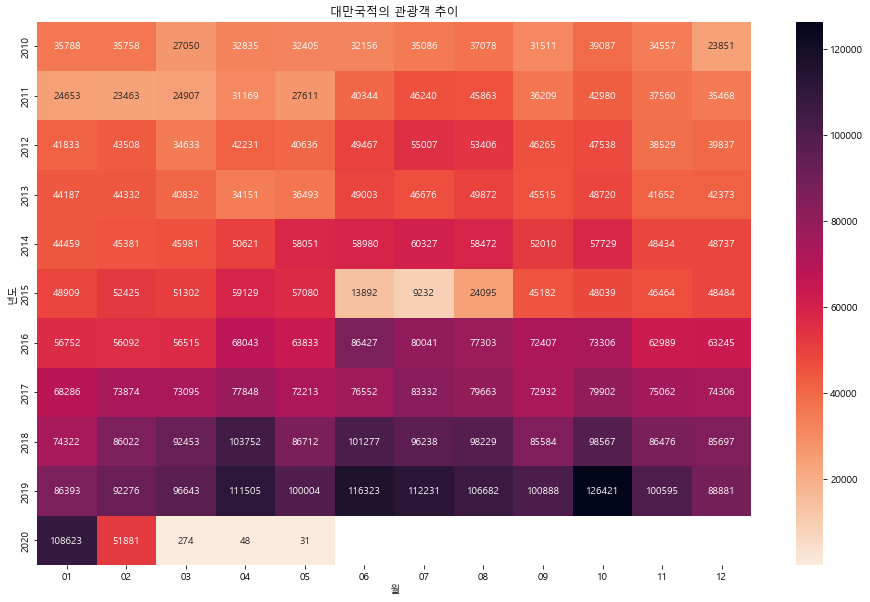

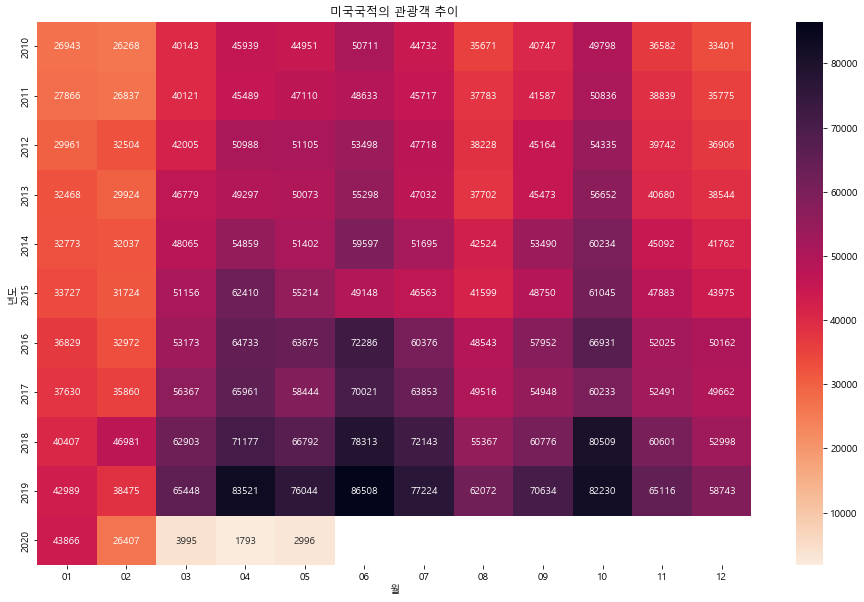

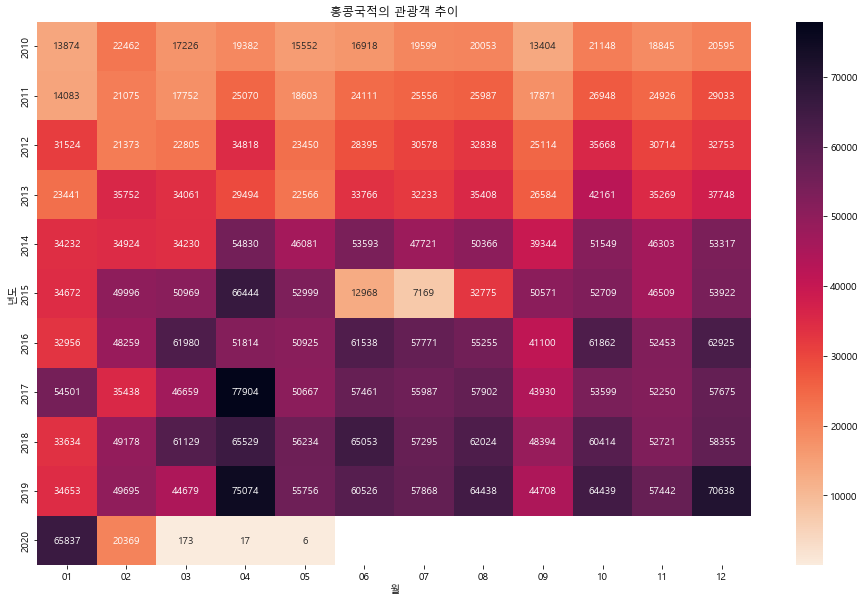

In [86]:
## 반복문을 사용하여 상위 5개국에 대한 히트맵 그래프 그리기
## 반복문으로 그래프 그리기
cntry_list = ['중국','일본','대만','미국','홍콩']
for cntry in cntry_list:
    ## 국적 관광객만 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values="관광", 
                                 index="년도",
                                 columns="월")
    ## 그래프 크기 설정
    plt.figure(figsize=(16,10))

    ## 히트맵 그래프 그리기
    sns.heatmap(df_pivot,annot=True,fmt='.0f',cmap="rocket_r")
    
    ## 타이틀, x축, y축 이름
    plt.title(f"{cntry}국적의 관광객 추이")
    plt.xlabel('월')
    plt.ylabel('년도')
    plt.show()